# Data Preprocessing

# Models

### Linear regression

(1,)
(1, 350)


ValueError: shapes (1,350) and (150,350) not aligned: 350 (dim 1) != 150 (dim 0)

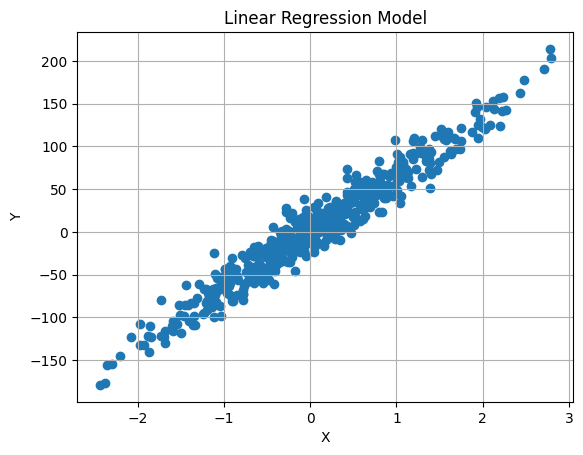

In [37]:
# import libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# class for linear regressor
class LinearRegressor:
        def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
                self.lr = lr
                self.n_iters = n_iters
                self.weights = None
                self.bias = None

        def fit(self, X, Y):
                num_samples, num_features = X.shape # [N, f]
                self.weights = np.random.rand(num_features) # [f, 1]
                self.bias = 0
                # print(self.weights.shape)

                for _ in range(self.n_iters):
                        Y_pred = np.dot(X, self.weights) + self.bias
                        
                        diff = Y_pred - Y
                        # print(X.T.shape)

                        dW = (1 / num_samples) * np.dot(X.T, diff)
                        dB = (1 / num_samples) * np.sum(diff)

                        self.weights = self.weights - self.lr * dW
                        self.bias = self.bias - self.lr * dB

                return self
        
        def predict(self, X):
                return np.dot(X, self.weights) + self.bias
        
if __name__ == "__main__":
        #prepare a dummy dataset for regression
        X, Y = datasets.make_regression(
                n_samples = 500,
                n_features = 1,
                noise = 15,
                random_state = 4  
        )
        X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

        # print the dummy dataset on a graph
        plt.grid()
        plt.title('Linear Regression Model')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.scatter(X[:, 0], Y)

        regressor = LinearRegressor()
        regressor.fit(X_train, Y_train)
        Y_pred = regressor.predict(X_test)

        print(f'MSE: {mean_squared_error(Y_pred, Y_test)}')



### AdaBoost

In [17]:
# import required modules for AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#import iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, shuffle = True) 

# define AdaBoost model
abc = AdaBoostClassifier(
        n_estimators = 50,
        learning_rate = 1
        )

# fit model
model = abc.fit(X_train, y_train)

# get predictions
y_pred = model.predict(X_test)

# get accuracy scores
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556
